<a href="https://colab.research.google.com/github/o2204/CodeAlpha_Credit-Card-Prediction/blob/main/Credit_Card_Clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.**


---


There are 25 variables:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and
3. family/supplementary credit
4. SEX: Gender (1=male, 2=female)
5. EDUCATION: (1, 2, 3, 4, 5, 6)
6. MARRIAGE: Marital status (1=married, 2=single, 3=others)
7. AGE: Age in years
8. PAY_0: Repayment status in September, 2005
9. PAY_2: Repayment status in August, 2005 (scale same as above)
10. PAY_3: Repayment status in July, 2005 (scale same as above)
11. PAY_4: Repayment status in June, 2005 (scale same as above)
12. PAY_5: Repayment status in May, 2005 (scale same as above)
13. PAY_6: Repayment status in April, 2005 (scale same as above)
14. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
15. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
16. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
17. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
18. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
19. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
20. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
21. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
22. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
23. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
24. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
25. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
27. default.payment.next.month: Default payment (1=yes, 0=no)

## Import Librarires

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import plotly.express as px
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score , classification_report , roc_curve


In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "UCI_Credit_Card.csv"

# Load the latest version
data = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/default-of-credit-card-clients-dataset",
  file_path)

print("First 5 records:", data.head())

<ipython-input-2-cbb04c0ca15b>:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  data = kagglehub.load_dataset(


100%|██████████| 0.98M/0.98M [00:00<00:00, 80.3MB/s]

Extracting zip of UCI_Credit_Card.csv...
First 5 records:    ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_A

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## EDA

In [4]:
data.shape

(30000, 25)

In [5]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [7]:
data['SEX'].value_counts()

,count
SEX,
2,18112
1,11888


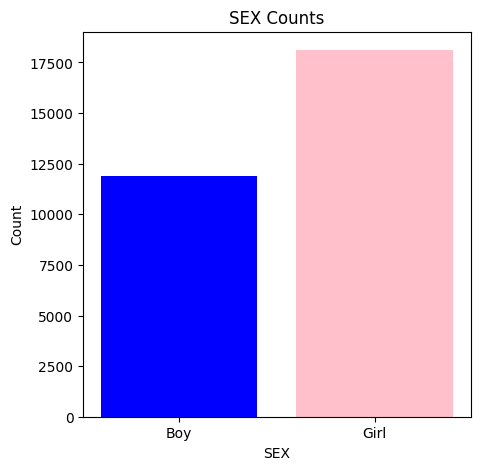

In [8]:
# Count values
sex_counts = data['SEX'].value_counts().sort_index()

# Make sure indexes are integers (1 = Boy, 2 = Girl)
index_ints = sex_counts.index.astype(int)

# Assign colors
colors = ['blue' if sex == 1 else 'pink' for sex in index_ints]

# Custom labels
labels = ['Boy' if sex == 1 else 'Girl' for sex in index_ints]

# Plot
plt.figure(figsize=(5, 5))
plt.title('SEX Counts')
plt.bar(labels, sex_counts.values, color=colors)
plt.xlabel('SEX')
plt.ylabel('Count')
plt.show()

In [9]:
data['default.payment.next.month'].unique()

array([1, 0])

In [10]:
data['default.payment.next.month'].value_counts()

,count
default.payment.next.month,
0,23364
1,6636


**The data is baise to 0**

In [11]:
counts = data['default.payment.next.month'].value_counts().sort_index()
labels = ['Will Pay', 'Will Default']

df = pd.DataFrame({
    'Status': labels,
    'Count': counts.values
})

fig = px.pie(df, names='Status', values='Count', title='Who Will Pay Next Month',
             color_discrete_sequence=['green', 'red'])

fig.update_traces(textinfo='percent+label', pull=[0.05, 0])

In [12]:
data.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [13]:
print('The Sum OF Duplicates: ',data.duplicated().sum())

The Sum OF Duplicates:  0


In [14]:
data.drop('ID',axis=1,inplace=True)

In [15]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Building Model

In [16]:
# Split data
X = data.drop('default.payment.next.month',axis=1)
y = data['default.payment.next.month']

In [17]:
print(len(X))
print(len(y))

30000
30000


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [25]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
X_test_scaled

X_train_scaled shape: (37382, 23)
X_test_scaled shape: (9346, 23)


array([[0.07070707, 0.        , 0.33333333, ..., 0.00166345, 0.00359339,
        0.00378689],
       [0.04383298, 0.        , 0.5       , ..., 0.00456352, 0.00558374,
        0.00725907],
       [0.14141414, 1.        , 0.33333333, ..., 0.00192593, 0.00294983,
        0.00234174],
       ...,
       [0.02020202, 1.        , 0.33333333, ..., 0.00158776, 0.00165315,
        0.00878627],
       [0.09090909, 0.        , 0.33333333, ..., 0.01976329, 0.00742841,
        0.03183106],
       [0.25252525, 1.        , 0.16666667, ..., 0.03737359, 0.30478002,
        0.        ]])

In [26]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_res).value_counts())

Before SMOTE: default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64
After SMOTE: default.payment.next.month
1    18700
0    18700
Name: count, dtype: int64


In [30]:
print(X_train_scaled.shape)
print(y_train.shape)

(37382, 23)
(37382,)


In [27]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
y_pred_log = logistic_model.predict(X_test_scaled)

In [32]:
print('===== Classification Report For LogisticRegression =====\n')
print(classification_report(y_test, y_pred_log))

===== Classification Report For LogisticRegression =====

              precision    recall  f1-score   support

           0       0.66      0.69      0.67      4664
           1       0.67      0.64      0.66      4682

    accuracy                           0.66      9346
   macro avg       0.66      0.66      0.66      9346
weighted avg       0.67      0.66      0.66      9346



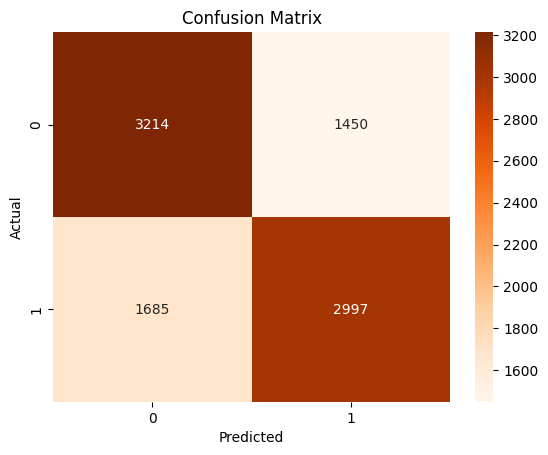

In [35]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



AUC-ROC Score: 0.723212938057727


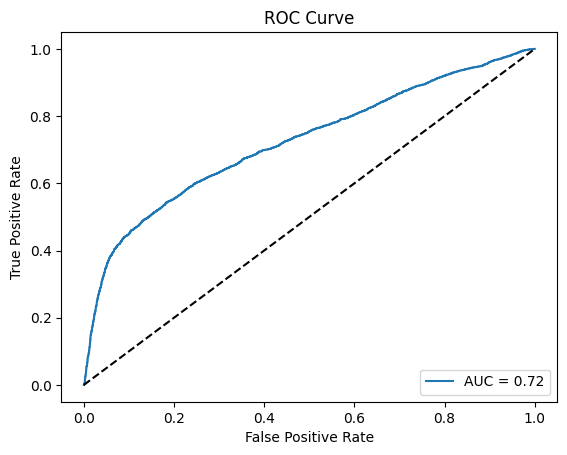

In [36]:
y_proba = logistic_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("AUC-ROC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [37]:
RandomForest_model = RandomForestClassifier()
RandomForest_model.fit(X_train_scaled, y_train)
y_pred_rand = RandomForest_model.predict(X_test_scaled)

In [38]:
print('===== Classification Report For RandomForestClassifier =====\n')
print(classification_report(y_test, y_pred_rand))

===== Classification Report For RandomForestClassifier =====

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4664
           1       0.87      0.81      0.84      4682

    accuracy                           0.85      9346
   macro avg       0.85      0.85      0.85      9346
weighted avg       0.85      0.85      0.85      9346



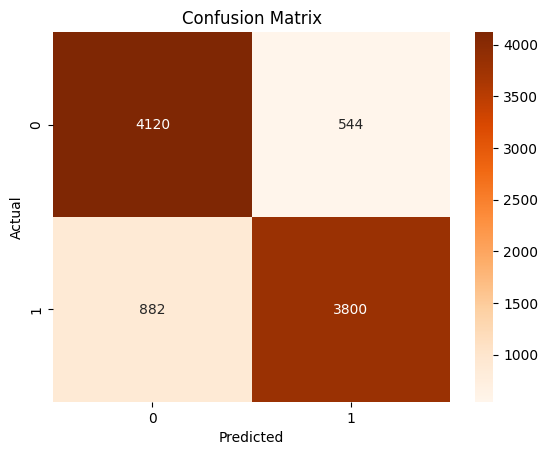

In [39]:
cm = confusion_matrix(y_test, y_pred_rand)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



AUC-ROC Score: 0.914360877540568


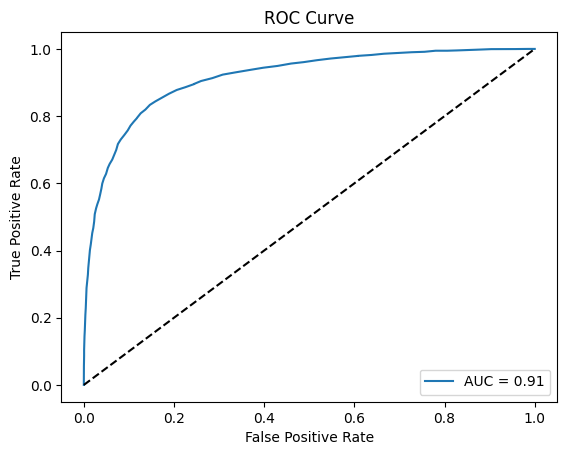

In [40]:
y_proba = RandomForest_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("AUC-ROC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [41]:
SVC_model = SVC()
SVC_model.fit(X_train_scaled, y_train)
y_pred_svc = SVC_model.predict(X_test_scaled)

In [42]:
print('===== Classification Report For SVC =====\n')
print(classification_report(y_test, y_pred_svc))

===== Classification Report For SVC =====

              precision    recall  f1-score   support

           0       0.66      0.84      0.74      4664
           1       0.77      0.56      0.65      4682

    accuracy                           0.70      9346
   macro avg       0.72      0.70      0.69      9346
weighted avg       0.72      0.70      0.69      9346



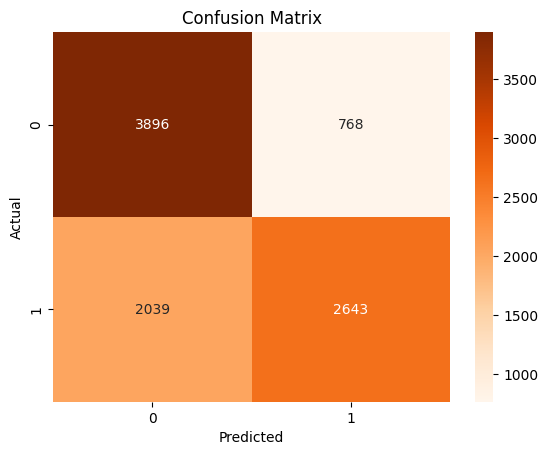

In [43]:
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [44]:
DecisionTreeClassifier_model = DecisionTreeClassifier()
DecisionTreeClassifier_model.fit(X_train_scaled, y_train)
y_pred_descision = DecisionTreeClassifier_model.predict(X_test_scaled)

In [45]:
print('===== Classification Report For DecisionTreeClassifier =====\n')
print(classification_report(y_test, y_pred_descision))

===== Classification Report For DecisionTreeClassifier =====

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      4664
           1       0.76      0.78      0.77      4682

    accuracy                           0.77      9346
   macro avg       0.77      0.77      0.77      9346
weighted avg       0.77      0.77      0.77      9346



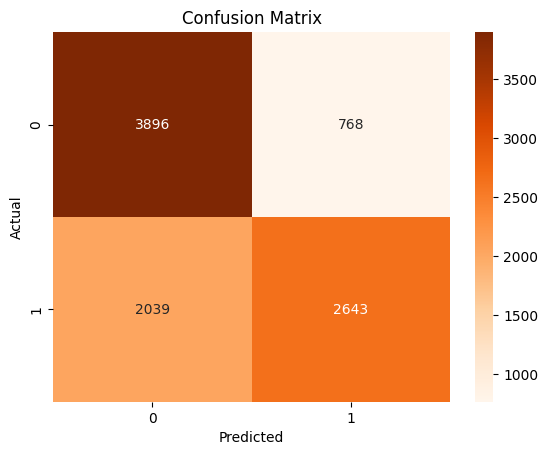

In [46]:
sm = confusion_matrix(y_test, y_pred_descision)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC-ROC Score: 0.7245403045347937


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



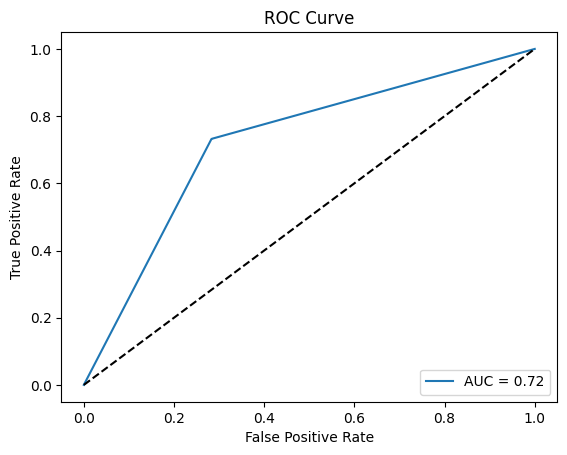

In [47]:
y_proba = DecisionTreeClassifier_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("AUC-ROC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [48]:
KNeighborsClassifier_model = KNeighborsClassifier()
KNeighborsClassifier_model.fit(X_train_scaled, y_train)
y_pred_kneig = KNeighborsClassifier_model.predict(X_test_scaled)

In [49]:
print('===== Classification Report For KNeighborsClassifier =====\n')
print(classification_report(y_test, y_pred_kneig))

===== Classification Report For KNeighborsClassifier =====

              precision    recall  f1-score   support

           0       0.83      0.68      0.75      4664
           1       0.73      0.86      0.79      4682

    accuracy                           0.77      9346
   macro avg       0.78      0.77      0.77      9346
weighted avg       0.78      0.77      0.77      9346



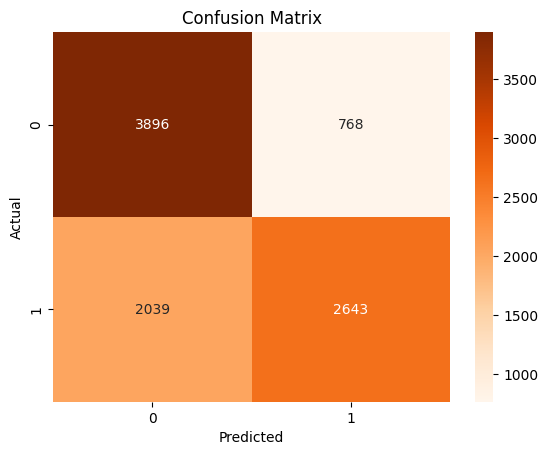

In [50]:
sm = confusion_matrix(y_test, y_pred_kneig)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



AUC-ROC Score: 0.8489284030369217


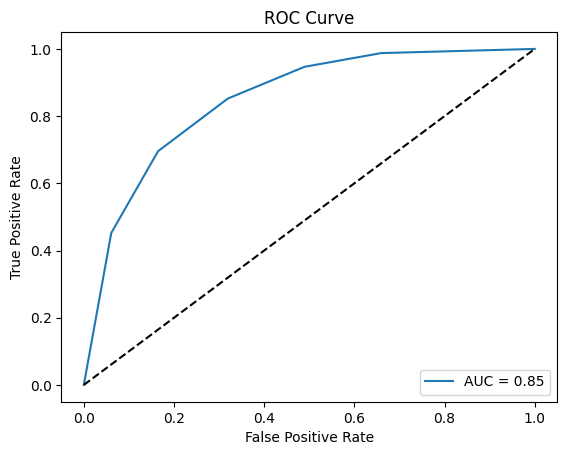

In [51]:
y_proba = KNeighborsClassifier_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("AUC-ROC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [52]:
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVC' , 'DecisionTreeClassifier' , 'KNeighborsClassifier'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rand),
        accuracy_score(y_test, y_pred_svc),
        accuracy_score(y_test, y_pred_descision),
        accuracy_score(y_test, y_pred_kneig)

    ],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rand),
        precision_score(y_test, y_pred_svc),
        precision_score(y_test, y_pred_descision),
        precision_score(y_test, y_pred_kneig)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rand),
        recall_score(y_test, y_pred_svc),
        recall_score(y_test, y_pred_descision),
        recall_score(y_test, y_pred_kneig)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rand),
        f1_score(y_test, y_pred_svc),
        f1_score(y_test, y_pred_descision),
        f1_score(y_test, y_pred_kneig)
    ]
}

comparison_df = pd.DataFrame(metrics)
print(comparison_df.head())

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.664562   0.673937  0.640111  0.656589
1           Random Forest  0.847421   0.874770  0.811619  0.842012
2                     SVC  0.699658   0.774846  0.564502  0.653157
3  DecisionTreeClassifier  0.767494   0.759785  0.783639  0.771528
4    KNeighborsClassifier  0.771132   0.729388  0.863520  0.790807


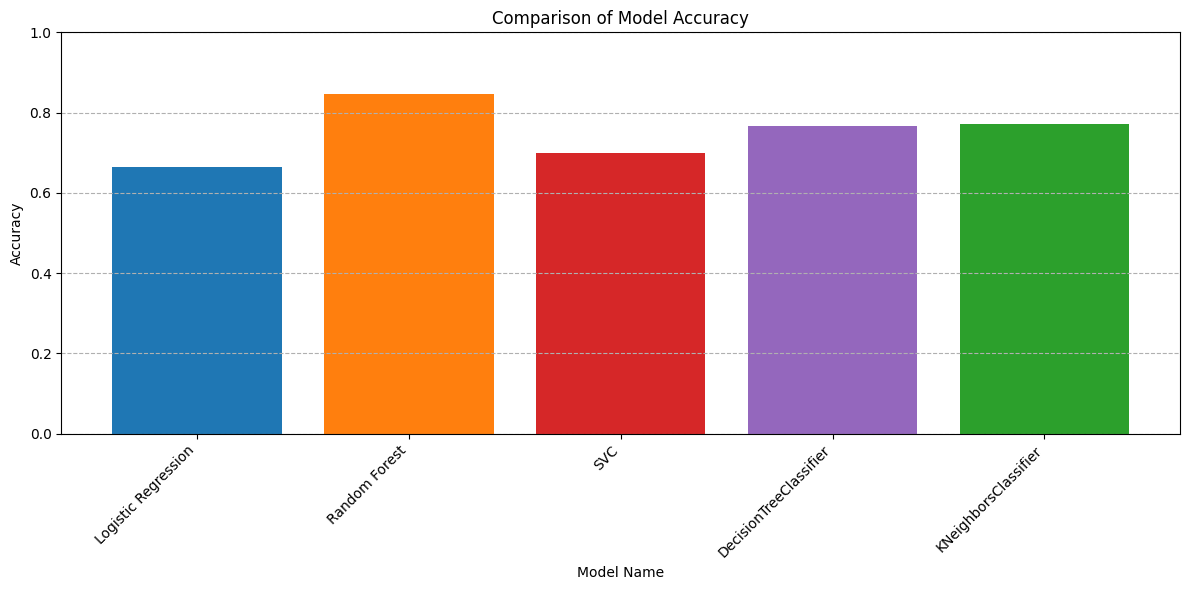

In [53]:
plt.figure(figsize=(12, 6))
plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color=['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#2ca02c', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()

In [54]:
best_model_row = comparison_df.loc[comparison_df['F1 Score'].idxmax()]
print("==== Best Model Based on F1 Score: ====")
print(best_model_row)

==== Best Model Based on F1 Score: ====
Model        Random Forest
Accuracy          0.847421
Precision          0.87477
Recall            0.811619
F1 Score          0.842012
Name: 1, dtype: object
